<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/neuron_glial_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-cb10295f93e3>:36: RuntimeWarning: overflow encountered in double_scalars
  dVndt = (Ina + Ik - kn) / Cn
/usr/local/lib/python3.9/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


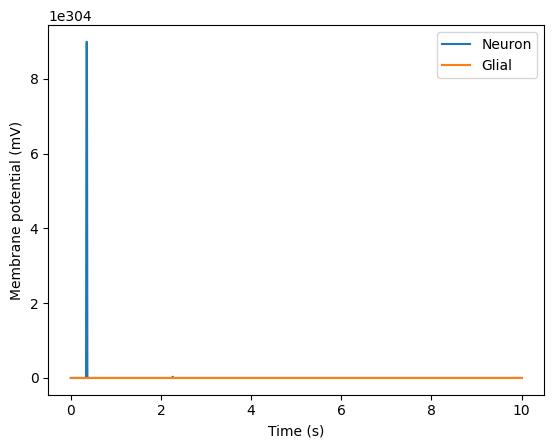

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define reversal potentials
Ena = 50.0  # mV
Ek = -77.0  # mV
Eg = -20.0  # mV

# Define the differential equation to be solved
def dydt(y, t):
    return -y + np.sin(t)

tn = 1e-4  # Membrane time constant for neurons
tg = 1e-3  # Membrane time constant for glial cells

# Define the hybrid model
def hybrid_model(y, t, Cn, Cg, Ena, Eg, gn, gk):
    global tn, tg

    # Unpack state variables
    Vn = y[0]
    Vg = y[1]
    kn = y[2]
    kg = y[3]

# Membrane currents for neurons
    Ik = gk * (Vn - Ek)
    Ina = gn * (Vn - Ena)


    # Membrane current for glial cells
    Ig = kg * (Vg - Eg)

    # Calculate derivatives
    dVndt = (Ina + Ik - kn) / Cn
    dVgdt = (Ig - gn * (Vg - En)) / Cg
    dkndt = -kn / tn
    dkgdt = -kg / tg

    # Pack derivatives
    dydt = [dVndt, dVgdt, dkndt, dkgdt]
    return dydt




# Simulation parameters
Cn = 0.01
Cg = 0.1
En = 0
Eg = -70
gn = 10
gk = 10

# Initial conditions
Vn0 = 0
Vg0 = -70
kn0 = 0.5
kg0 = 0.5
y0 = [Vn0, Vg0, kn0, kg0]

# Time vector
t = np.linspace(0, 10, 1000)

# Solve the differential equation using the hybrid model
sol = odeint(hybrid_model, y0, t, args=(Cn, Cg, En, Eg, gn, gk))
Vn = sol[:, 0]
Vg = sol[:, 1]

# Plot the results
plt.plot(t, Vn, label='Neuron')
plt.plot(t, Vg, label='Glial')
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (mV)')
plt.legend()
plt.show()
